## 인사이트 도출

### 유저 메접 예측기 아이디어

#### 접은 사람의 기준?
- 캐릭터 정보 - 랭킹 히스토리 - 집계날짜/종합랭킹/월드랭킹/직업랭킹/인기도랭킹/레벨/경험치
- 종합랭킹 월드랭킹 직업랭킹 인기도랭킹 - 의미없음
- 레벨 - 고랩일수록 레벨 1 올리는데 시간이 많이 걸리므로 의미 없을거 같음
- 집계날짜에 따른 경험치 변동추이로 기준을 잡자!

In [ ]:
# 기본 정보 조회
headers = {
    "x-nxopen-api-key": "test_894cbc7c1e6fc3db5b54614eb927bcd9303e913039d6a4a3ee5b7ec4b140130aefe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=dc97cb84d3fda6df8b898b0257cfe6f0&date=2025-04-10"
response = requests.get(url, headers=headers)
data = response.json()

print(f"이름:{data['character_name']}")
print(f"월드:{data['world_name']}")
print(f"성별:{data['character_gender']}")
print(f"직업:{data['character_class']}")
print(f"직업 레벨:{data['character_class_level']}")
print(f"레벨:{data['character_level']}")
print(f"경험치:{data['character_exp']}")
print(f"경험치 비율:{data['character_exp_rate']}")
print(f"길드 이름:{data['character_guild_name']}")
print(f"캐릭터 생성 날짜:{data['character_date_create']}")

- 접속한지 오래된 본인 캐릭 정보를 현재날짜 기준으로 보니 null값이 나옴

In [ ]:
# 캐릭터 식별자 (ocid) 조회
headers = {
    "x-nxopen-api-key": "test_894cbc7c1e6fc3db5b54614eb927bcd9303e913039d6a4a3ee5b7ec4b140130aefe8d04e6d233bd35cf2fabdeb93fb0d"
}

character_name = "오지환"
url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
response = requests.get(url, headers=headers)

print(response.json())

- 전체랭킹 1등 "오지환"의 캐릭터 기본 정보 조회

In [ ]:
# 기본 정보 조회
headers = {
    "x-nxopen-api-key": "test_894cbc7c1e6fc3db5b54614eb927bcd9303e913039d6a4a3ee5b7ec4b140130aefe8d04e6d233bd35cf2fabdeb93fb0d"
}

ocid = "e39f3066e9e969f077e0e2419dee386d"
url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date=2025-04-10"
response = requests.get(url, headers=headers)
data = response.json()

print(f"이름:{data['character_name']}")
print(f"월드:{data['world_name']}")
print(f"성별:{data['character_gender']}")
print(f"직업:{data['character_class']}")
print(f"직업 레벨:{data['character_class_level']}")
print(f"레벨:{data['character_level']}")
print(f"경험치:{data['character_exp']}")
print(f"경험치 비율:{data['character_exp_rate']}")
print(f"길드 이름:{data['character_guild_name']}")
print(f"캐릭터 생성 날짜:{data['character_date_create']}")

- 하지만 만랩(300)인 경우는 경험치와 경험치 퍼센트가 0으로 나오는것을 볼수 있음
- 신규유저 레벨(1)도 경험치와 퍼센트가 둘다 0으로 나오는지는 모르겠지만 나중에 이거에 대한 처리는 나중에 생각해봐야할거 같음

### 우려가 되는점
- 모든 캐릭터에 대한 수치를 들고 올 수 있는가?

### 장비 메타분석

- 메이플을 플레이 하면서 현재 레벨대에 어떤 장비를 세팅을 해야하는지 혹은 그 장비를 어떻게 얻어야하는지 모르는 사람들이 있음(특히 뉴비 혹은 장기 복귀자)
- 레벨별 주요 세팅 (예: 200~210 유저는 이런 세팅을 많이 사용함)을 알려주고 그걸 얻을수있는 방법을 알려주기(예: 루타비스 셋 - 카오스 루타비스)

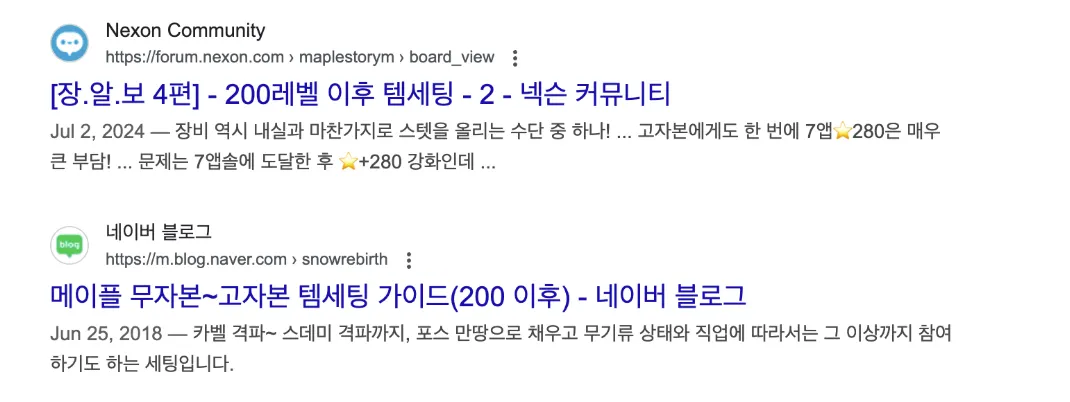

- 특히 레벨 200 이후 아케인 리버를 가면서 원투킬이 나던 몬스터들이 확정 투킬 or 3킬이 나기 시작하는 구간
- 템 세팅을 어느정도 해야함 -> 하지만 뉴비나 복귀한지 오래된 유저는 어떻게 해야하는지에 대한걸 유튜브나 블로그 및 커뮤니티를 찾아봐야함

- 나아가 추천하는 보스몹을 알려주면서 그 보스 몹을 잡기 위해 필요한 장비 및 전투력 차이 확인할수 있도록 개선

- 캐릭터 기본 정보 /  장착 장비 정보 조회(캐시 장비 제외)

- 랭킹 api를 통해 일정 수의 상위 유저 목럭 확보 (1000명)

## 직업별 OCID 추출

In [ ]:
import requests
import urllib.parse
import time
import pandas as pd

# 카데나 - 전체직업
headers = {
    "x-nxopen-api-key" : "live_894cbc7c1e6fc3db5b54614eb927bcd9ae15c0eeddf53f337288526957c78db5efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 랭킹 1~200
url_page1 = "https://open.api.nexon.com/maplestory/v1/ranking/overall?date=2025-04-14&class=%EC%B9%B4%EB%8D%B0%EB%82%98-%EC%A0%84%EC%B2%B4%20%EC%A0%84%EC%A7%81"
response1 = requests.get(url_page1, headers=headers)
data1 = response1.json()

# 랭킹 201~400
url_page2 = "https://open.api.nexon.com/maplestory/v1/ranking/overall?date=2025-04-14&class=%EC%B9%B4%EB%8D%B0%EB%82%98-%EC%A0%84%EC%B2%B4%20%EC%A0%84%EC%A7%81&page=2"
response2 = requests.get(url_page2, headers=headers)
data2 = response2.json()

# 랭킹 데이터 병합
combined_ranking = data1.get("ranking", []) + data2.get("ranking", [])

# 캐릭터 이름으로 ocid 조회
def get_ocid(character_name):
    encoded_name = urllib.parse.quote(character_name)
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json().get("ocid")
    else:
        print(f"[오류] {character_name} - 상태 코드: {response.status_code}")
        return None

# 결과 리스트
character_ocid_list = []

# 모든 캐릭터에 대해 ocid 가져오기
for i, entry in enumerate(combined_ranking, start=1):
    name = entry["character_name"]
    ocid = get_ocid(name)
    character_ocid_list.append({
        "rank": i,
        "character_name": name,
        "world_name": entry["world_name"],
        "level": entry["character_level"],
        "class": entry["class_name"],
        "sub_class": entry["sub_class_name"],
        "ocid": ocid
    })
    time.sleep(0.2)

# DataFrame으로 변환
df = pd.DataFrame(character_ocid_list)

# CSV로 저장
df.to_csv("cadena_ranking_ocid.csv", index=False, encoding="utf-8-sig")

print("\n CSV 저장 완료: cadena_ranking_ocid.csv")

## JSON 평탄화 작업

### item-equipment

In [ ]:
import json
import pandas as pd

# JSON 파일 불러오기
with open("theif_json/칼리_전체 전직.json", "r", encoding="utf-8") as f: # 파일 경로 변경할 것!
    data = json.load(f)

# 샘플링 (앞에서 3명)
# sampled_data = data[:3]

# 캐릭터별 장비 데이터 추출
rows = []
for char in data:
    base_info = {
        "nickname": char.get("nickname"),
        "world": char.get("world"),
        "level": char.get("level"),
        "job": char.get("job"),
        "subclass": char.get("subclass"),
        # "gender": char.get("item-equipment", {}).get("character_gender"), # 캐릭터 성별
        # "preset_no": char.get("item-equipment", {}).get("preset_no"), # 적용 중인 장비 프리셋 번호
        # 예 : 카데나 랭킹 1위 별왕은 4/15 기준 프리셋이 3(으)로 설정되어있음
        # 예 : 카데나 랭킹 4위 사슬낫의제니는 4/15 기준 프리셋이 2로 설정되어있음
    }

    # 프리셋 설정
    preset_keys = [
        "item_equipment_preset_1",
        "item_equipment_preset_2",
        "item_equipment_preset_3"
    ]

    for preset_idx, preset_key in enumerate(preset_keys, start=1):
        items = char.get("item-equipment", {}).get(preset_key, [])
        for item in items:
            row = base_info.copy()
            row["preset_number"] = preset_idx # 프리셋 번호
            row["equipment_part"] = item.get("item_equipment_part") # 장비 부위 명
            row["equipment_slot"] = item.get("item_equipment_slot") # 장비 슬롯 위치
            row["item_name"] = item.get("item_name") # 이름
            # 장비 설명, 장비 외형, 전용 성별은 제외

            ######################
            # itemTotalOption : 장비 최종 옵션

            row["str_total"] = item.get("item_total_option", {}).get("str") # 최종 능력치 str
            row["dex_total"] = item.get("item_total_option", {}).get("dex") # 최종 능력치 dex
            row["int_total"] = item.get("item_total_option", {}).get("int") # 최종 능력치 int
            row["luk_total"] = item.get("item_total_option", {}).get("luk") # 최종 능력치 luk
            row["max_hp_total"] = item.get("item_total_option", {}).get("max_hp") # 최종 능력치 max_hp
            row["max_mp_total"] = item.get("item_total_option", {}).get("max_mp") # 최종 능력치 max_mp
            row["attack_power_total"] = item.get("item_total_option", {}).get("attack_power") # 최종 능력치 attack_power
            row["magic_power_total"] = item.get("item_total_option", {}).get("magic_power") # 최종 능력치 magic_power
            row["armor_total"] = item.get("item_total_option", {}).get("armor") # 최종 능력치 armor
            row["speed_total"] = item.get("item_total_option", {}).get("speed") # 최종 능력치 speed
            row["jump_total"] = item.get("item_total_option", {}).get("jump") # 최종 능력치 jump
            row["boss_damage_total"] = item.get("item_total_option", {}).get("boss_damage") # 최종 능력치 boss_damage
            row["ignore_monster_armor_total"] = item.get("item_total_option", {}).get("ignore_monster_armor") # 최종 능력치 ignore_monster_armor
            row["all_stat_total"] = item.get("item_total_option", {}).get("all_stat") # 최종 능력치 all_stat
            row["damage_total"] = item.get("item_total_option", {}).get("damage") # 최종 능력치 damage
            row["equipment_level_decrease_total"] = item.get("item_total_option", {}).get("equipment_level_decrease") # 최종 능력치 equipment_level_decrease
            row["max_hp_rate_total"] = item.get("item_total_option", {}).get("max_hp_rate") # 최종 능력치 max_hp_rate
            row["max_mp_rate_total"] = item.get("item_total_option", {}).get("max_mp_rate") # 최종 능력치 max_mp_rate

            ######################
            # itemBaseOption : 장비 기본 옵션

            row["str_base"] = item.get("item_base_option", {}).get("str") # 기본 능력치 str
            row["dex_base"] = item.get("item_base_option", {}).get("dex") # 기본 능력치 dex
            row["int_base"] = item.get("item_base_option", {}).get("int") # 기본 능력치 int
            row["luk_base"] = item.get("item_base_option", {}).get("luk") # 기본 능력치 luk
            row["max_hp_base"] = item.get("item_base_option", {}).get("max_hp") # 기본 능력치 max_hp
            row["max_mp_base"] = item.get("item_base_option", {}).get("max_mp") # 기본 능력치 max_mp
            row["attack_power_base"] = item.get("item_base_option", {}).get("attack_power") # 기본 능력치 attack_power
            row["magic_power_base"] = item.get("item_base_option", {}).get("magic_power") # 기본 능력치 magic_power
            row["armor_base"] = item.get("item_base_option", {}).get("armor") # 기본 능력치 armor
            row["speed_base"] = item.get("item_base_option", {}).get("speed") # 기본 능력치 speed
            row["jump_base"] = item.get("item_base_option", {}).get("jump") # 기본 능력치 jump
            row["boss_damage_base"] = item.get("item_base_option", {}).get("boss_damage") # 기본 능력치 bose_damage
            row["ignore_monster_armor_base"] = item.get("item_base_option", {}).get("ignore_monster_armor") # 기본 능력치 ignore_monster_armor
            row["all_stat_base"] = item.get("item_base_option", {}).get("all_stat") # 기본 능력치 all_stat
            row["max_hp_rate_base"] = item.get("item_base_option", {}).get("max_hp_rate") # 기본 능력치 max_hp_rate
            row["max_mp_rate_base"] = item.get("item_base_option", {}).get("max_mp_rate") # 기본 능력치 max_mp_rate
            row["base_equipment_level_base"] = item.get("item_base_option", {}).get("base_equipment_level") # 기본 능력치 base_equipment_level

            ######################
            # 잠재능력 + 에디셔널 잠재능력

            row["potential_option_grade"] = item.get("potential_option_grade") # 잠재능력 등급
            row["additional_potential_option_grade"] = item.get("additional_potential_option_grade") # 에디셔널 잠재능력 등급
            # row["potential_option_flag"] = item.get("potential_option_flag")
            row["potential_option_1"] = item.get("potential_option_1") # 잠재능력 1
            row["potential_option_2"] = item.get("potential_option_2") # 잠재능력 2
            row["potential_option_3"] = item.get("potential_option_3") # 잠재능력 3
            # row["additional_potential_option_flag"] = item.get("additional_potential_option_flag")
            row["additional_potential_option_1"] = item.get("additional_potential_option_1") # 에디셔널 잠재능력 1
            row["additional_potential_option_2"] = item.get("additional_potential_option_2") # 에디셔널 잠재능력 2
            row["additional_potential_option_3"] = item.get("additional_potential_option_3") # 에디셔널 잠재능력 3
            row["equipment_level_increase"] = item.get("equipment_level_increase") # 착용 레벨 증가

            ######################
            # itemExceptionalOption : 장비 특별 옵션

            row["str_exceptional"] = item.get("item_exceptional_option", {}).get("str") # 특별 능력치 str
            row["dex_exceptional"] = item.get("item_exceptional_option", {}).get("dex") # 특별 능력치 dex
            row["int_exceptional"] = item.get("item_exceptional_option", {}).get("int") # 특별 능력치 int
            row["luk_exceptional"] = item.get("item_exceptional_option", {}).get("luk") # 특별 능력치 luk
            row["max_hp_exceptional"] = item.get("item_exceptional_option", {}).get("max_hp") # 특별 능력치 max_hp
            row["max_mp_exceptional"] = item.get("item_exceptional_option", {}).get("max_mp") # 특별 능력치 max_mp
            row["attack_power_exceptional"] = item.get("item_exceptional_option", {}).get("attack_power") # 특별 능력치 attack_power
            row["magic_power_exceptional"] = item.get("item_exceptional_option", {}).get("magic_power") # 특별 능력치 magic_power
            row["exceptional_upgrade"] = item.get("item_exceptional_option", {}).get("exceptional_upgrade") # 익셉셔널 강화 적용 횟수

            ######################
            # itemAddOption : 장비 추가 옵션

            row["str_add"] = item.get("item_add_option", {}).get("str") # 추가 능력치 str
            row["dex_add"] = item.get("item_add_option", {}).get("dex") # 추가 능력치 dex
            row["int_add"] = item.get("item_add_option", {}).get("int") # 추가 능력치 int
            row["luk_add"] = item.get("item_add_option", {}).get("luk") # 추가 능력치 luk
            row["max_hp_add"] = item.get("item_add_option", {}).get("max_hp") # 추가 능력치 max_hp
            row["max_mp_add"] = item.get("item_add_option", {}).get("max_mp") # 추가 능력치 max_mp
            row["attack_power_add"] = item.get("item_add_option", {}).get("attack_power") # 추가 능력치 attack_power
            row["magic_power_add"] = item.get("item_add_option", {}).get("magic_power") # 추가 능력치 magic_power
            row["armor_add"] = item.get("item_add_option", {}).get("armor") # 추가 능력치 armor
            row["speed_add"] = item.get("item_add_option", {}).get("speed") # 추가 능력치 speed
            row["jump_add"] = item.get("item_add_option", {}).get("jump") # 추가 능력치 jump
            row["boss_damage_add"] = item.get("item_add_option", {}).get("boss_damage") # 추가 능력치 boss_damage
            row["damage_add"] = item.get("item_add_option", {}).get("damage") # 추가 능력치 damage
            row["all_stat_add"] = item.get("item_add_option", {}).get("all_stat") # 추가 능력치 all_stat
            row["equipment_level_decrease_add"] = item.get("item_add_option", {}).get("equipment_level_decrease") # 착용 레벨 감소

            ######################
            # itemEtcOption : 장비 기타 옵션

            row["str_etc"] = item.get("item_etc_option", {}).get("str") # 기타 능력치 str
            row["dex_etc"] = item.get("item_etc_option", {}).get("dex") # 기타 능력치 dex
            row["int_etc"] = item.get("item_etc_option", {}).get("int") # 기타 능력치 int
            row["luk_etc"] = item.get("item_etc_option", {}).get("luk") # 기타 능력치 luk
            row["max_hp_etc"] = item.get("item_etc_option", {}).get("max_hp") # 기타 능력치 max_hp
            row["max_mp_etc"] = item.get("item_etc_option", {}).get("max_mp") # 기타 능력치 max_mp
            row["attack_power_etc"] = item.get("item_etc_option", {}).get("attack_power") # 기타 능력치 attack_power
            row["magic_power_etc"] = item.get("item_etc_option", {}).get("magic_power") # 기타 능력치 magic_power
            row["armor_etc"] = item.get("item_etc_option", {}).get("armor") # 기타 능력치 armor
            row["speed_etc"] = item.get("item_etc_option", {}).get("speed") # 기타 능력치 speed
            row["jump_etc"] = item.get("item_etc_option", {}).get("jump") # 기타 능력치 jump

            ######################
            # itemStarforceOption : 장비 스타포스 옵션

            row["starforce"] = item.get("starforce") # 스타포스
            row["starforce_scroll_flag"] = item.get("starforce_scroll_flag") # 놀라운 장비 강화 주문서 사용 여부 (0:미사용, 1:사용)
            row["str_starforce"] = item.get("item_starforce_option", {}).get("str") # 스타포스 능력치 str
            row["dex_starforce"] = item.get("item_starforce_option", {}).get("dex") # 스타포스 능력치 dex
            row["int_starforce"] = item.get("item_starforce_option", {}).get("int") # 스타포스 능력치 int
            row["luk_starforce"] = item.get("item_starforce_option", {}).get("luk") # 스타포스 능력치 luk
            row["max_hp_starforce"] = item.get("item_starforce_option", {}).get("max_hp") # 스타포스 능력치 max_hp
            row["max_mp_starforce"] = item.get("item_starforce_option", {}).get("max_mp") # 스타포스 능력치 max_mp
            row["attack_power_starforce"] = item.get("item_starforce_option", {}).get("attack_power") # 스타포스 능력치 attack_power
            row["magic_power_starforce"] = item.get("item_starforce_option", {}).get("magic_power") # 스타포스 능력치 magic_power
            row["armor_starforce"] = item.get("item_starforce_option", {}).get("armor") # 스타포스 능력치 armor
            row["speed_starforce"] = item.get("item_starforce_option", {}).get("speed") # 스타포스 능력치 speed
            row["jump_starforce"] = item.get("item_starforce_option", {}).get("jump") # 스타포스 능력치 jump
            row["special_ring_level"] = item.get("special_ring_level") # 특수 반지 레벨
            # row["date_expire"] = item.get("item_starforce_option", {}).get("date_expire") # 장비 유효 기간

            ######################
            # 기타

            row["growth_exp"] = item.get("growth_exp") # 성장 경험치
            row["growth_level"] = item.get("growth_level") # 성장 레벨
            row["scroll_upgrade"] = item.get("scroll_upgrade") # 업그레이드 횟수
            row["cuttable_count"] = item.get("cuttable_count") # 가위 사용 가능 횟수 (교환 불가 장비, 가위 횟수가 없는 교환 가능 장비는 255)
            row["golden_hammer_flag"] = item.get("golden_hammer_flag") # 황금 망치 재련 적용 (1:적용, 이외 미 적용)
            row["scroll_resilience_count"] = item.get("scroll_resilience_count") # 복구 가능 횟수
            row["scroll_upgradeable_count"] = item.get("scroll_upgradeable_count") # 업그레이드 가능 횟수
            row["soul_name"] = item.get("soul_name") # 소울 명
            row["soul_option"] = item.get("soul_option") # 소울 옵션


            rows.append(row)

# DataFrame 생성
df = pd.DataFrame(rows)

# 결과 확인
# print(df.head())

# DataFrame 저장
df.to_csv("khali_equipment.csv", index=False, encoding="utf-8-sig") # 각 직업에 맞게 파일명 변경!
print("CSV 저장 완료!")

### hyper-stat

In [ ]:
import json
import pandas as pd

# JSON 파일 불러오기
with open("bow_json/카인_전체 전직.json", "r", encoding="utf-8") as f: # 파일명 변경할 것!
    data = json.load(f)

# 샘플링 (앞에서 3명)
# sampled_data = data[:3]

# 캐릭터별 하이퍼 스텟 데이터 추출
rows = []
for char in data:
    base_info = {
            "nickname": char.get("nickname"),
            "world": char.get("world"),
            "level": char.get("level"),
            "job": char.get("job"),
            "subclass": char.get("subclass"),
    }

    # 프리셋 설정
    preset_keys = [
        "hyper_stat_preset_1",
        "hyper_stat_preset_2",
        "hyper_stat_preset_3"
    ]

    for preset_idx, preset_key in enumerate(preset_keys, start=1):
        stats = char.get("hyper-stat", {}).get(preset_key, [])
        for stat in stats:
            row = base_info.copy()
            row["preset_number"] = preset_idx # 프리셋 번호
            row["stat_type"] = stat.get("stat_type") # 스탯 종류
            row["stat_point"] = stat.get("stat_point") # 스탯 투자 포인트
            row["stat_level"] = stat.get("stat_level") # 스탯 레벨
            row["stat_increase"] = stat.get("stat_increase") # 스탯 상승량


            rows.append(row)

# 데이터프레임 생성
df = pd.DataFrame(rows)

# 결과 확인
# print(df.head())

# CSV로 저장
df.to_csv("kain_hyper_stat.csv", index=False, encoding="utf-8-sig") # 각 직업에 맞게 파일명 변경!
print("CSV 저장 완료!")

### ability

In [ ]:
import json
import pandas as pd

# JSON 파일 불러오기
with open("theif_json/칼리_전체 전직.json", "r", encoding="utf-8") as f: # 파일명 변경할 것!
    data = json.load(f)

# 캐릭터별 어빌리티 데이터 추출
rows = []
for char in data:
    base_info = {
        "nickname": char.get("nickname"),
        "world": char.get("world"),
        "level": char.get("level"),
        "job": char.get("job"),
        "subclass": char.get("subclass"),
        # "remain_fame": char.get("remain_fame") # 보유 명성치
    }

    # 프리셋 설정
    preset_keys = [
        "ability_preset_1",
        "ability_preset_2",
        "ability_preset_3"
    ]

    for preset_idx, preset_key in enumerate(preset_keys, start=1):
        preset_data = char.get("ability", {}).get(preset_key, {})

        # preset_data가 None이 나닌 경우에만 처리
        if preset_data:
            # 어빌리티 등급 (프리셋 등급)
            preset_grade = preset_data.get("ability_preset_grade")

            # 실제 어빌리티 옵션들
            abilitys = preset_data.get("ability_info", [])

            for ability in abilitys:
                row = base_info.copy()
                row["preset_number"] = preset_idx # 프리셋 번호
                row["preset_grade"] = preset_grade # 프리셋의 어빌리티 등급
                row["ability_no"] = ability.get("ability_no") # 어빌리티 번호
                row["ability_grade"] = ability.get("ability_grade") # 어빌리티 등급
                row["ability_value"] = ability.get("ability_value") # 어빌리티 옵션 및 수치


                rows.append(row)

# 데이터프레임 생성
df = pd.DataFrame(rows)

# 결과 확인
# print(df.head())

# CSV로 저장
df.to_csv("khali_ability.csv", index=False, encoding="utf-8-sig") # 각 직업에 맞게 파일명 변경!
print("CSV 저장 완료!")

### union 통합코드

In [ ]:
import json
import pandas as pd
import re

job_class = "카인_전체 전직" # 한글 파일명
job_class_eng = "kain" # 영문 파일명

# JSON 파일 불러오기
with open(f"bow_json/{job_class}.json", "r", encoding="utf-8") as f: # 파일 경로 수정해주세요!
    data = json.load(f)

# 샘플링 (앞에서 3명)
# sampled_data = data[:3]

# 캐릭터별 모든 union 데이터 추출
rows = []

for char in data:
    base_info = {
        "nickname": char.get("nickname"),
        "world": char.get("world"),
        "level": char.get("level"),
        "job": char.get("job"),
        "subclass": char.get("subclass"),
    }

    ######################
    # union : 유니온

    union_info = char.get("union", {})
    base_info.update({
        "union_level": union_info.get("union_level"), # 유니온 레벨
        "union_grade": union_info.get("union_grade"), # 유니온 등급
        "union_artifact_level": union_info.get("union_artifact_level"), # 아티펙트 레벨
        # "union_artifact_exp": union_info.get("union_artifact_exp"), # 보유 아티펙트 경험치
        # "union_artifact_point": union_info.get("union_artifact_point") # 보유 아티펙트 포인트
    })

    ######################
    # UnionRaider : 유니온 공격대

    # 프리셋 1번 ~ 5번
    for i in range(1, 6):
        preset_key = f"union_raider_preset_{i}"
        raider = char.get("union-raider", {}).get(preset_key, {})

        if raider:  # ← None 체크 먼저!
            base_info[f"union_rader_preset{i}_stat"] = ', '.join(raider.get("union_raider_stat", []))
            base_info[f"union_rader_preset{i}_occupied"] = ', '.join(raider.get("union_occupied_stat", []))
        else:
            base_info[f"union_rader_preset{i}_stat"] = ''
            base_info[f"union_rader_preset{i}_occupied"] = ''
        # unionInnerStat(유니온 공격대 배치), unionBlock(유니온 블록 정보)는 제외

    ######################
    # UnionArtifact : 유니온 아티팩트

    def normalize_effect_name(name: str) -> str:
        name = re.sub(r'[\d\.,]+%?', '', name)
        name = re.sub(r'\s+', ' ', name).strip()
        return name

    artifact = char.get("union-artifact", {})
    effects = artifact.get("union_artifact_effect", [])

    for eff in effects:
        norm_name = normalize_effect_name(eff['name']) # 아티팩트 효과 명
        base_info[f"artifact_effect_{norm_name}"] = eff["level"] # 아티팩트 효과 레벨

    # 현재 유니온 아티팩트는 주황버섯부터 파플라투스까지 개방되어있다
    crystals = artifact.get("union_artifact_crystal", [])
    for idx, crystal in enumerate(crystals):
        base_info[f"crystal_{idx+1}_name"] = crystal.get("name") # 아티팩트 크리스탈 명
        base_info[f"crystal_{idx+1}_opt1"] = crystal.get("crystal_option_name_1") # 아티팩트 크리스탈 첫 번째 옵션 명
        base_info[f"crystal_{idx+1}_opt2"] = crystal.get("crystal_option_name_2") # 아티팩트 크리스탈 두 번째 옵션 명
        base_info[f"crystal_{idx+1}_opt3"] = crystal.get("crystal_option_name_3") # 아티팩트 크리스탈 세 번째 옵션 명

    ######################
    # unionChampion : 유니온 챔피언

    # 현재 챔피언 슬롯 개방은 3까지
    champion_data = char.get("union-champion", {})
    champions = champion_data.get("union_champion", [])

    for champion in champions:
        slot = champion.get("champion_slot")
        badge_info = champion.get("champion_badge_info", [])
        badge_stats = [badge.get("stat", "") for badge in badge_info]
        base_info[f"champion_preset_{slot}_badges"] = ', '.join(badge_stats)

    rows.append(base_info)

# 데이터프레임 생성
df_union = pd.DataFrame(rows)

# CSV로 저장
df_union.to_csv(f"{job_class_eng}_union_data.csv", index=False, encoding="utf-8-sig")
print("CSV 저장 완료!")